# Keywords and Defined Terms

## About
This section is looking at how the keywords could be connected 
with Defined Terms that point to external vocabularies that follow
a vocabulary publishing patterns like at the W3C
[Best Practice Recipes for Publishing RDF Vocabularies](https://www.w3.org/TR/swbp-vocab-pub/).

The pattern breaks down a bit when attempting to connect with things like 
the [Global Change Master Directory keywords](https://earthdata.nasa.gov/earth-observation-data/find-data/idn/gcmd-keywords).
This impedance is caused by publishing approaches for the terms that don't align well with 
the above publishing practices.  This does not mean we can not use these terms, rather that
we may find multiple ways to connect them used by the community.  This can result in some
ambiguity in linking in a community.  



A person could adapt the pattern to connect things like the [Global Change Observing System](https://public.wmo.int/en/programmes/global-climate-observing-system/essential-climate-variables)
or 
[EARTH SCIENCE > OCEANS > OCEAN CHEMISTRY](https://gcmd.earthdata.nasa.gov/KeywordViewer/scheme/all/6eb3919b-85ce-4988-8b78-9d0018fd8089?gtm_keyword=OCEAN%20CHEMISTRY&gtm_scheme=Earth%20Science).  The later of these does have a UUID (6eb3919b-85ce-4988-8b78-9d0018fd8089) but this is not a dereference-able PID.


```{note}
This topic of keyword linking with DefinedTerms is under review at the [Science on Schema](https://github.com/ESIPFed/science-on-schema.org)
work at ESIP.   Reference [Describing a Dataset](https://github.com/ESIPFed/science-on-schema.org/blob/master/guides/Dataset.md)
for the latest on their recommendations. 
```

## Keywords

The Schema.org [keywords](https://schema.org/keywords) property of [CreativeWork](https://schema.org/CreativeWork) can point to three different values.
These are: [DefinedTerm](https://schema.org/DefinedTerm), [Text](https://schema.org/Text) and [URL](https://schema.org/URL).  

We can see the three different approaches here to defining keywords.  Here, _Region X_ is a classic 
text keyword.  The other two are defined as a [DefinedTerm](https://schema.org/DefinedTerm).



```{literalinclude} ../../../odis-in/dataGraphs/thematics/terms/graphs/map.json
:linenos:
:emphasize-lines: 17-31
```

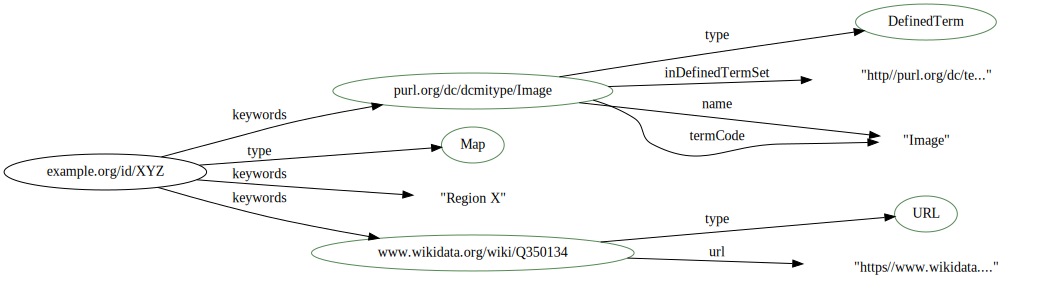

In [1]:
import json
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
from pyld import jsonld
import graphviz
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("../../../odis-in/dataGraphs/thematics/terms/graphs/map.json") as dgraph:
    doc = json.load(dgraph)

frame = {
  "@context": {"@vocab": "https://schema.org/"},
  "@explicit": "true",
  "@requireAll": "true",
  "@type":     "Map",
  "keywords": ""
}

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)

framed = jsonld.frame(compacted, frame)

jbutils.show_graph(framed)

### Text

Keywords can be defined as a [Text](https://schema.org/Text) value.  This is the most common approach though 
it doesn't provide some of the benefits of the other two approaches.  For example, it doesn't allow for terms to 
be dereferenced on the net or for connects in the graph to be made for common terms by their subject IRIs. 

```
{
  "@context": "https://schema.org/",
  "keywords": [
    "nitrous oxide", 
    "Central Pacific", 
    "headspace equilibration", 
    "SRI Greenhouse Gas Monitoring Gas Chromatograph", 
    "CTD profiler", 
    "Gas Chromatograph"
  ]
}
```

```{note}
Be sure to use the [] notation to define the keyword.  This defined an array of items vs a single items.  If you
use an approach like {"term1, term2, term4"} you have only created a single text string with comma separated values.  However
that is viewed as a single string in the graph.   The [] notation creates an array of strings all connected to the subject IRI
by the property _keywords_.
```

### URL

Keywords can also point to a URL.  This provides a way to link to a vocabulary entry that defines the term.  This approach 
has some benefits of linking to more details but does easily provide an easy descriptive text for humans.  There is nothing 
preventing putting in a text keyword followed up by another entry with a related URL.

### DefinedTerm

This is the most complex approach.  Keywords can point to a [DefinedTerm](https://schema.org/DefinedTerm) as
defined in a [DefinedTermSet](https://schema.org/DefinedTermSet) pointed to by
the property [inDefinedTermSet](https://schema.org/inDefinedTermSet).  It does offer the ability to present both a human
focused textual name and description of the term.  This is a great way to link to a vocabulary entry that defines the term.
It also allows for a URL to be used to link to the vocabulary entry.   While this approach is the most comprehensive, it does
incur a complexity during the query process to extract and present the information.  

## Defined Terms

During generation of the structured data a provide may wish to
either use or publish a set of controlled vocabulary terms or
a similar set.  

Within schema.org this could be done by leveraging the "DefinedTerm"
amd "DefinedTermSet" types.  

These types allow us both to define a set of terms and
use a set of terms in describing a thing.

Note that DefinedTerm is an intangible and can connect to most
types in Schema.org.  So we can use them in places such as:

* [CreativeWork](https://schema.org/CreativeWork) -> [keyword](https://schema.org/keywords)
* [CreativeWork](https://schema.org/CreativeWork) -> [learningResourceType](https://schema.org/learningResourceType)
* [LearningResource](https://schema.org/LearningResource) -> [teaches](https://schema.org/teaches)  (and many others)
* [LearningResource](https://schema.org/LearningResource) -> [competencyRequired](https://schema.org/competencyRequired)  (and many others)
* [PropertyValue](https://schema.org/PropertyValue) -> [valueReference](https://schema.org/valueReference)

The following example is from the Schema.org [DefinedTermSet](https://schema.org/DefinedTermSet)
reference.

```{literalinclude} ../../../odis-in/dataGraphs/thematics/terms/graphs/term.json
:linenos:
```

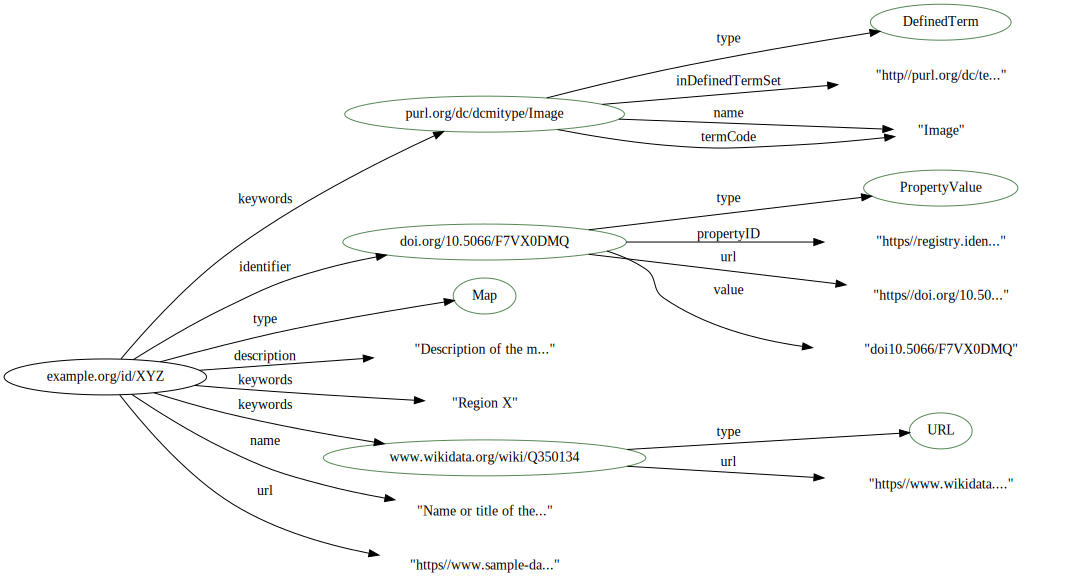

In [2]:
import json
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
from pyld import jsonld
import graphviz
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("../../../odis-in/dataGraphs/thematics/terms/graphs/map.json") as dgraph:
    doc = json.load(dgraph)

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)
jbutils.show_graph(compacted)

## References

* [schema.org/DefinedTerm](https://schema.org/DefinedTerm)
* [schema.org/DefinedTermSet](https://schema.org/DefinedTermSet)